In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline
import math

In [5]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [6]:
sim=Aer.get_backend('qasm_simulator')
statevector_Sim=Aer.get_backend('statevector_simulator')

In [7]:
def run_on_sim(circuit):
    statevector_job=execute(circuit,backend=statevector_Sim)
    result=statevector_job.result()
    statevector=result.get_statevector()
    num_qubits=circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)],[i for i in range(num_qubits)])
    qasm_job=execute(circuit,backend=sim,shots=1024).result()
    counts=qasm_job.get_counts()
    return statevector,counts
    

In [8]:
circuit=QuantumCircuit(2,2)
statevector,count=run_on_sim(circuit)

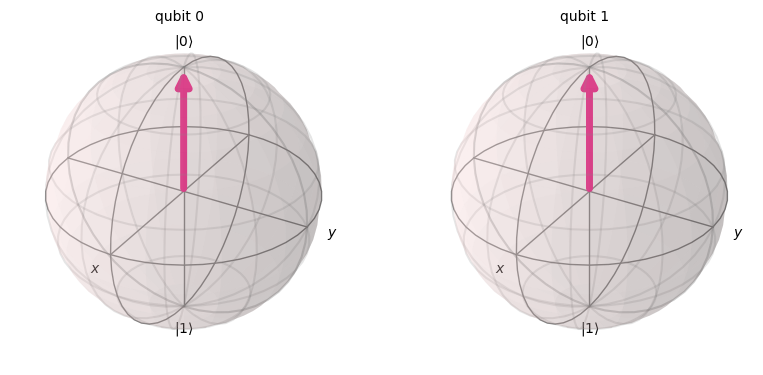

In [9]:
plot_bloch_multivector(statevector)

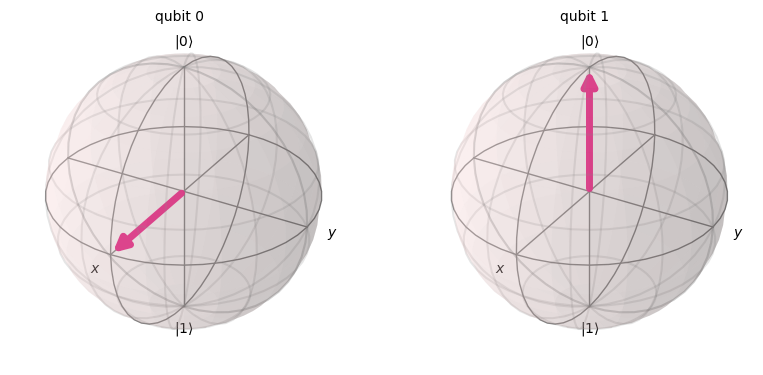

In [10]:
circuit.h(0)
statevector,count=run_on_sim(circuit)
plot_bloch_multivector(statevector)

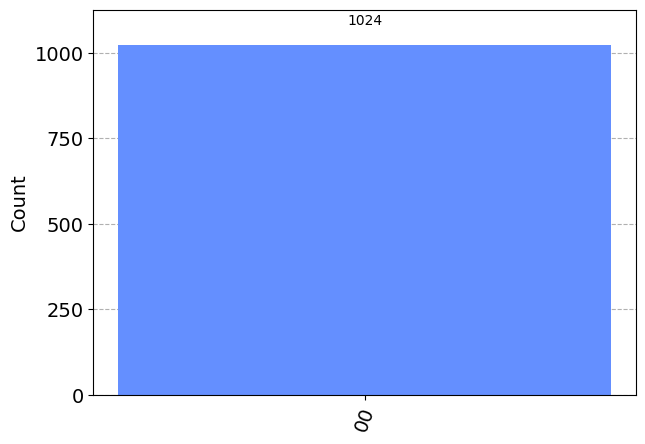

In [15]:
circuit=QuantumCircuit(2,2)
circuit.cx(0,1)
statevector,count=run_on_sim(circuit)
plot_bloch_multivector(statevector)
plot_histogram([count])

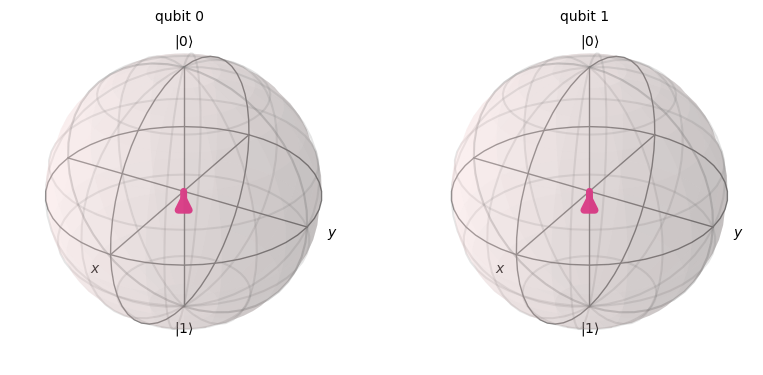

In [16]:
circuit=QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevector,count=run_on_sim(circuit)
plot_bloch_multivector(statevector) # We cant see entanglement in quantum bloch sphere 

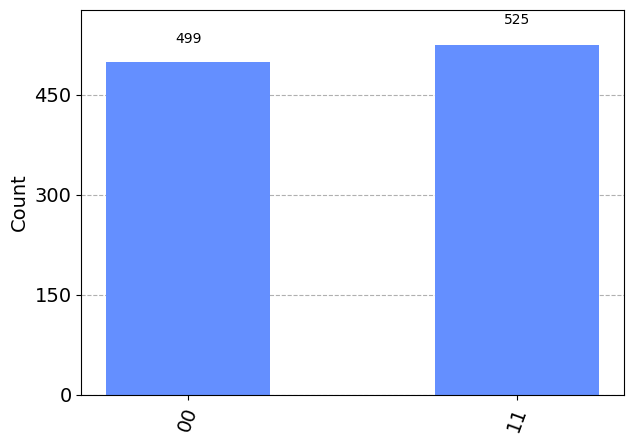

In [17]:
plot_histogram([count])

In [19]:
circuit=QuantumCircuit(2,2)
circuit.rx(math.pi/4,0) # rotate pi/4 around x axis
circuit.cx(math.pi/2,1)# rotate pi/2 arount x axis
statevector,count=run_on_sim(circuit)
plot_bloch_multivector(statevector) 

Traceback (most recent call last):
  Cell In[19], line 3
    circuit.cx(math.pi/2,1)# rotate pi/2 arount x axis
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:3861 in cx
    return self.append(
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1302 in append
    expanded_qargs = [self.qbit_argument_conversion(qarg) for qarg in qargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1302 in <listcomp>
    expanded_qargs = [self.qbit_argument_conversion(qarg) for qarg in qargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1183 in qbit_argument_conversion
    return _bit_argument_conversion(
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:5156 in _bit_argument_conversion
    raise CircuitError(message) from ex
CircuitError: "Invalid bit index: '1.5707963267948966' of type '<class 'float'>'"

Use %tb to get the full tra